## Cluster Analysis
Is a subset of unsupervised learning methods

### Introduction to Unsupervised Learning
* Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
* Model tries to find relationship between data.
* Most common unsupervised learning method is clustering which is used for exploratory data analysis to find hidden patterns or grouping in data

### Clustering
* A learning technique to group a set of objects in such a way that objects of same group are more similar to each other than from objects of other group.
* Applications of clustering are as follows
  - Automatically organizing the data
  - Labeling data
  - Understanding hidden structure of data
  - News Cloustering for grouping similar news together
  - Customer Segmentation
  - Suggest social groups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

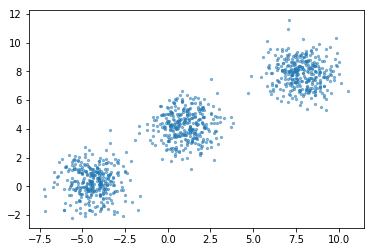

In [3]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

### Distance or Similarity Function
* Data belonging to same cluster are similar & data belonging to different cluster are different. 
* We need mechanisms to measure similarity & differences between data. 
* This can be achieved using any of the below techniques.

 - Minkowiski breed of distance calculation: 
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
 
 - Manhatten (p=1), Euclidian (p=2)
 
 - Cosine: Suited for text data
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d"> 

In [4]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [7]:
X = [[0, 1], [1, 1], [1, 1.75]]
# X = np.random.normal(0,1,(100,2))

In [8]:
euclidean_distances(X, X)

array([[0.  , 1.  , 1.25],
       [1.  , 0.  , 0.75],
       [1.25, 0.75, 0.  ]])

In [9]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356],
       [2.01556444]])

In [10]:
cosine_distances(X,X)

array([[0.        , 0.29289322, 0.13175686],
       [0.29289322, 0.        , 0.03523618],
       [0.13175686, 0.03523618, 0.        ]])

In [11]:
manhattan_distances(X,X)

array([[0.  , 1.  , 1.75],
       [1.  , 0.  , 0.75],
       [1.75, 0.75, 0.  ]])

### 4. Clustering as an Optimization Problem
* Maximize inter-cluster distances
* Minimize intra-cluster distances

### 5. Types of Clustering
* Partitioning methods
  - Partitions n data into k partitions
  - Initially, random partitions are created & gradually data is moved across different partitions.
  - It uses distance between points to optimize clusters.
  - KMeans & Meanshift are examples of Partitioning methods
* Hierarchical methods
  - These methods does hierarchical decomposition of datasets.
  - One approach is, assume each data as cluster & merge to create a bigger cluster
  - Another approach is start with one cluster & continue splitting
* Density-based methods
  - All above techniques are distance based & such methods can find only spherical clusters and not suited for clusters of other shapes.
  - Continue growing the cluster untill the density exceeds certain threashold.

###  Partitioning Method
#### KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/kmeans2.png?raw=true">

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif)

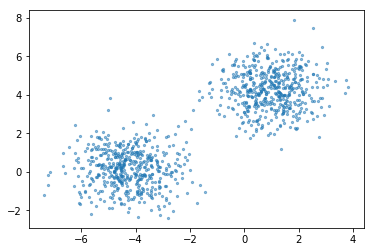

In [12]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=2, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

In [13]:
from sklearn.datasets import make_blobs, make_moons

In [23]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=1)

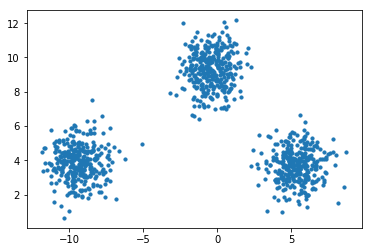

In [24]:
plt.scatter(X[:,0], X[:,1],s=10)

In [25]:
from sklearn.cluster import KMeans, MeanShift

In [32]:
kmeans = KMeans(n_clusters=3)

In [33]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

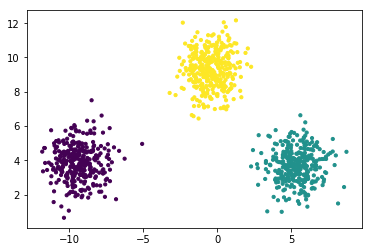

In [34]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

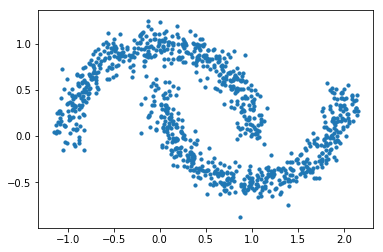

In [61]:
X, y = make_moons(n_samples=1000, noise=.09)

plt.scatter(X[:,0], X[:,1],s=10)

In [43]:
kmeans = KMeans(n_clusters=2)

In [44]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

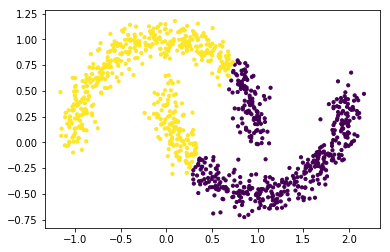

In [45]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

#### Limitations of KMeans
* Assumes that clusters are convex & behaves poorly for elongated clusters.
* Probability for participation of data to multiple clusters.
* KMeans tries to find local minima & this depends on init value.

#### Meanshift
* Centroid based clustering algorithm.
* Mode can be understood as highest density of data points.

In [46]:
kmeans = KMeans(n_clusters=4)

In [47]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

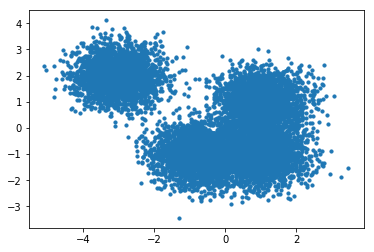

In [48]:
plt.scatter(X[:,0], X[:,1],s=10)

In [49]:
kmeans = KMeans(n_clusters=4)

In [62]:
ms = MeanShift()

In [63]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [67]:
# plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))

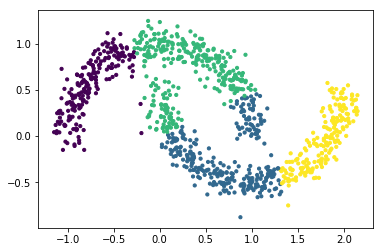

In [68]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

### 7. Hierarchial Clustering
* A method of clustering where you combine similar clusters to create a cluster or split a cluster into smaller clusters such they now they become better.
* Two types of hierarchaial Clustering
  - Agglomerative method, a botton-up approach.
  - Divisive method, a top-down approach.

#### Agglomerative method
* Start with assigning one cluster to each data. 
* Combine clusters which have higher similarity.
* Differences between methods arise due to different ways of defining distance (or similarity) between clusters. The following sections describe several agglomerative techniques in detail.
  - Single Linkage Clustering
  - Complete linkage clustering
  - Average linkage clustering
  - Average group linkage

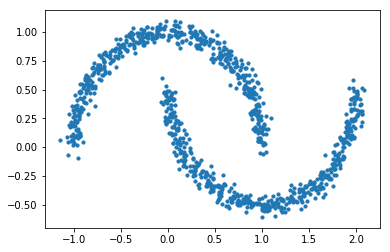

In [69]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
agc = AgglomerativeClustering(linkage='single')

In [72]:
agc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2,
            pooling_func='deprecated')

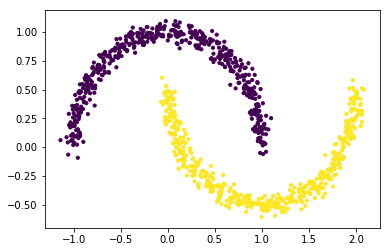

In [73]:
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

### 8. Density Based Clustering - DBSCAN
* 

In [74]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

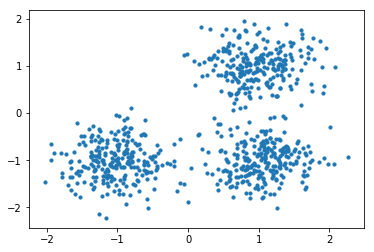

In [75]:
plt.scatter(X[:,0], X[:,1],s=10)

In [76]:
from sklearn.cluster import DBSCAN

In [77]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

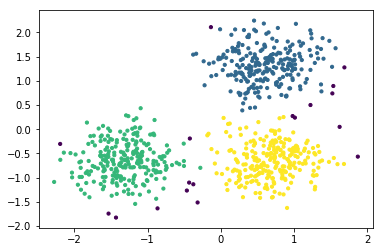

In [78]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

### 9. Measuring Performance of Clusters
* Two forms of evaluation 
* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [81]:
from sklearn.metrics.cluster import completeness_score

In [83]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [84]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


In [86]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [87]:
from sklearn.metrics.cluster import homogeneity_score

In [88]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [91]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [92]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

In [94]:
homogeneity_score([0, 0, 1, 1], [1, 0, 1, 1])

0.31127812445913283

* Same class data is broken into two clusters